In [1]:
%%capture 

# Important header information
#amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'         # official version
#amrwindfedir = '/projects/hfm/lcheung/amrwind-frontend'
amrwindfedir = '/projects/hfm/lcheung/amrwind-frontend/'
import sys, os
sys.path.insert(1, amrwindfedir)
sys.path.insert(1, '../utilities')

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import SOWFAdata as sowfa
import postproamrwindsample as ppsample

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

# Setup
## The input file

In [2]:
# Print the input file
inputfile='ATLVINEYARD_big1.inp'
%cat ATLVINEYARD_big1.inp

# --- Simulation time control parameters ---
time.stop_time                           = 43200.0             # Max (simulated) time to evolve [s]
time.max_step                            = 172800              
time.fixed_dt                            = 0.25                # Fixed timestep size (in seconds). If negative, then time.cfl is used
time.checkpoint_interval                 = 20000               
incflo.physics                           = ABL                 # List of physics models to include in simulation.
incflo.verbose                           = 3                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno_z              
turbulence.model                         = OneEqKsgsM84        
TKE.source_terms                         = KsgsM84Src          
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol             

## Plot the domain

This is what the case looks like -- it should be a 1.5km x 1.5km case with wind from 230 degrees southwest.

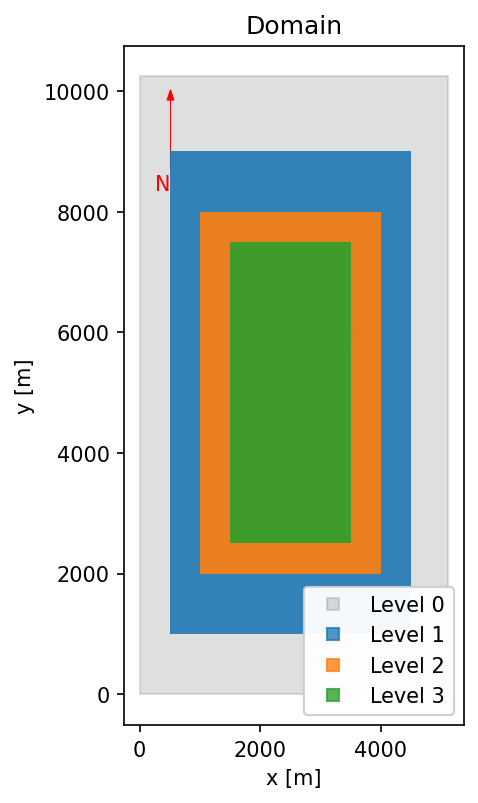

In [3]:
# Start the amrwind_frontend app 
tutorial2 = amrwind.MyApp.init_nogui()

# Load the input into the app
tutorial2.loadAMRWindInput(inputfile)

fig, ax = plt.subplots(figsize=(3,6), facecolor='w', dpi=150)

# Set any additional items to plot
tutorial2.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] #['p_hub']
tutorial2.popup_storteddata['plotdomain']['plot_refineboxes']     = ['box40', 'box20', 'box10']
tutorial2.plotDomain(ax=ax)

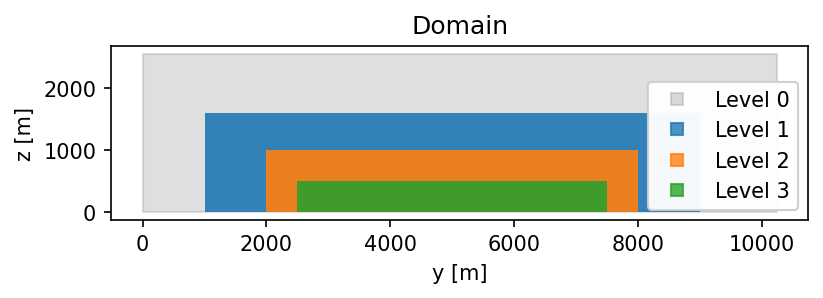

In [4]:
fig, ax = plt.subplots(figsize=(6,4), facecolor='w', dpi=150)

# Set any additional items to plot
tutorial2.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
tutorial2.popup_storteddata['plotdomain']['plot_chooseview']      = 'YZ'
tutorial2.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] 
tutorial2.popup_storteddata['plotdomain']['plot_refineboxes']     = ['box40', 'box20', 'box10']
tutorial2.plotDomain(ax=ax)